In [1]:
from transformers import pipeline

# Use Hugging Face pipeline for sentiment analysis
classifier = pipeline("sentiment-analysis")
print(classifier("I love learning NLP!"))


/home/jangcha/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-15 17:40:02.337813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750002002.357914   24999 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750002002.364167   24999 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750002002.379572   24999 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 0

[{'label': 'POSITIVE', 'score': 0.9995231628417969}]


In [2]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN dobj
startup VERB advcl
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [4]:
# pip install -U spacy
# python -m spacy download en_core_web_sm
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun GPE
Recode ORG
earlier this week DATE


## Pipeline

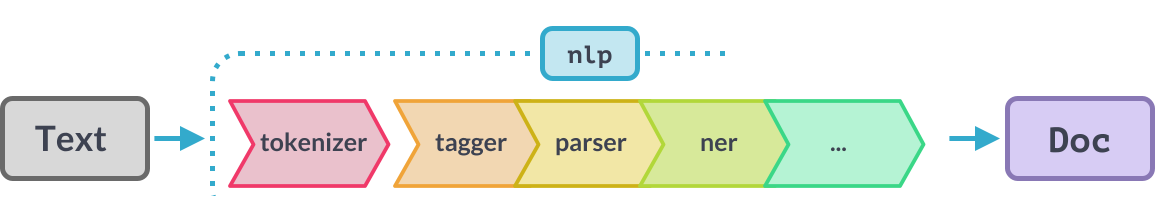

In [5]:
from IPython.core.display import SVG
SVG(url='https://spacy.io/images/pipeline.svg')

In [6]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x77821d883580>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x77821d8834c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x77821d914430>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x77821d5eb880>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x77821d5cf600>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x77821d9142e0>)]

In [7]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
print("..........................................................")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP nsubj X.X. False False
startup startup VERB VBD ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
..........................................................
Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [12]:
for token in doc:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

Apple True 6.7813044 True
is True 7.497386 True
looking True 6.799752 True
at True 6.765654 True
buying True 8.256932 True
U.K. True 7.493188 True
startup True 5.258532 True
for True 6.5701 True
$ True 8.750212 True
1 True 9.714702 True
billion True 7.9830923 True


In [14]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.31738382608139487
salty fries <-> hamburgers 0.2891702353954315


/tmp/ipykernel_24999/3439612522.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1, "<->", doc2, doc1.similarity(doc2))
/tmp/ipykernel_24999/3439612522.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use on

In [17]:
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

3197928453018144401
coffee


In [18]:
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en


In [21]:
import spacy
from spacy.tokens import Doc
from spacy.vocab import Vocab
empty_doc = Doc(Vocab())  # New Doc with empty Vocab
# empty_doc.vocab.strings[3197928453018144401] will raise an error :(

empty_doc.vocab.strings.add("coffee")  # Add "coffee" and generate hash
print(empty_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

new_doc = Doc(doc.vocab)  # Create new doc with first doc's vocab
print(new_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

coffee
coffee
